**This is the code for the machine learning model**

In order to use this code, your data must be saved as **"TotalTrafo.csv"** in the same folder as this code

In [5]:
#import neccessary tools and the csv file "TotalTrafo"
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv("TotalTrafo.csv")

In [6]:
#Look at the data and shape it, so the right format is used and it can be seperated
dir(data)
type(data.Trafo_Total)

pandas.core.series.Series

In [7]:
# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
Y = data['Trafo_Total']
X = data.drop(['Trafo1', 'Trafo2', 'datetime', 'Trafo_Total', 'Month', 'Day'],axis=1)

#check the format and the shape of the data again
print(X)
#print(Y)

      Hour  Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  \
0        0        1     -4.70       2.2       -5.23      1012        97   
1        1        1     -5.20       2.7       -4.92      1012        94   
2        2        1     -5.70       2.0       -5.48      1012        92   
3        3        1     -5.00       1.7       -5.10      1012        93   
4        4        1     -4.64       0.0       -5.64      1012        93   
...    ...      ...       ...       ...         ...       ...       ...   
8755    19        1     -2.30       8.4       -1.54      1016        41   
8756    20        1     -3.00       7.8       -3.70      1017        48   
8757    21        1     -2.20       7.1       -0.42      1018        60   
8758    22        1     -2.30       6.9       -1.94      1019        53   
8759    23        1     -2.50       6.9       -2.17      1020        53   

      Wind Speed  
0           1.18  
1           1.00  
2           1.00  
3           0.52  
4   

In [8]:
data.Trafo_Total.shape

(8760,)

In [9]:
data['Trafo_Total']

0       47.17
1       48.64
2       48.58
3       46.85
4       48.45
        ...  
8755    76.42
8756    63.23
8757    53.12
8758    58.75
8759    46.59
Name: Trafo_Total, Length: 8760, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train, sample_weight = None)

LinearRegression()

In [12]:
predictions = lr.predict(X_test)
len(predictions)

1752

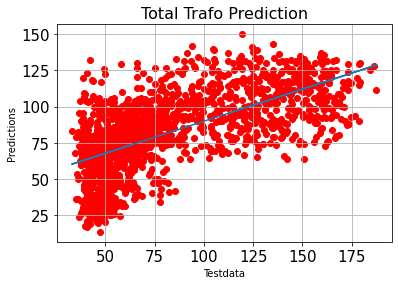

In [25]:
#plot the predictions vs, the testdata in a scatterplot with grid
plt.scatter(Y_test, predictions, color='red')
plt.title('Total Trafo Prediction', fontname='sans-serif', fontsize=16)
plt.xlabel("Testdata")
plt.ylabel("Predictions")
plt.grid(True)

#add a linear polynomial fit line to the plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(Y_test, predictions, 1)
plt.plot(Y_test, b + m * Y_test, '-')

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE = r2_score(Y_test, predictions)
RMSE = np.sqrt(mean_squared_error(Y_test, predictions))
RMSE = round(RMSE, 2)

In [16]:
txt1 = "The MAE is {MAE}".format(MAE = MAE)
txt2 = "With this model we can predict the energy consumption on a specific day within the range of \033[1m {RMSE} kW".format(RMSE = RMSE)

print(txt1)
print(txt2)

The MAE is 0.4122397402104474
With this model we can predict the energy consumption on a specific day within the range of  29.24 kW


**Comparison of Trafo1 + Trafo2 with TotalTrafo prediction data**

Trafo1

In [17]:
#import neccessary tools and the csv file "Housing"
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline
data1 = pd.read_csv("TotalTrafo.csv")

#Look at the data and shape it, so the right format is used and it can be seperated
dir(data1)
type(data1.Trafo1)

# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
B = data1['Trafo1']
A = data1.drop(['Trafo1', 'Trafo2', 'datetime', 'Trafo_Total', 'Month', 'Day'],axis=1)


data1.Trafo1.shape
data1['Trafo1']

from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.2, random_state = 65)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(A_train, B_train, sample_weight = None)

predictions1 = lr.predict(A_test)
len(predictions1)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE1 = r2_score(B_test, predictions1)
RMSE1 = np.sqrt(mean_squared_error(B_test, predictions1))
RMSE1 = round(RMSE1, 2)

print(predictions1)

[21.44846086 48.53932711 33.28720077 ... 45.71068523 41.58537872
 35.98257378]


Trafo 2

In [18]:
%matplotlib inline
data2 = pd.read_csv("TotalTrafo.csv")

#Look at the data and shape it, so the right format is used and it can be seperated
dir(data2)
type(data2.Trafo2)

# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
D = data2['Trafo2']
C = data2.drop(['Trafo1', 'Trafo2', 'datetime', 'Trafo_Total', 'Month', 'Day'],axis=1)


data2.Trafo2.shape
data2['Trafo2']

from sklearn.model_selection import train_test_split
C_train, C_test, D_train, D_test = train_test_split(C, D, test_size = 0.2, random_state = 65)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(C_train, D_train, sample_weight = None)

predictions2 = lr.predict(C_test)
len(predictions2)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE2 = r2_score(D_test, predictions2)
RMSE2 = np.sqrt(mean_squared_error(D_test, predictions2))
RMSE2 = round(RMSE2, 2)

print(predictions2)

[ 7.4714068  35.84103244 19.05956927 ... 30.90656376 33.43182527
 35.15699906]


In [19]:
trafo12 = predictions1 + predictions2

In [20]:
artx = list(range(1, 1753))

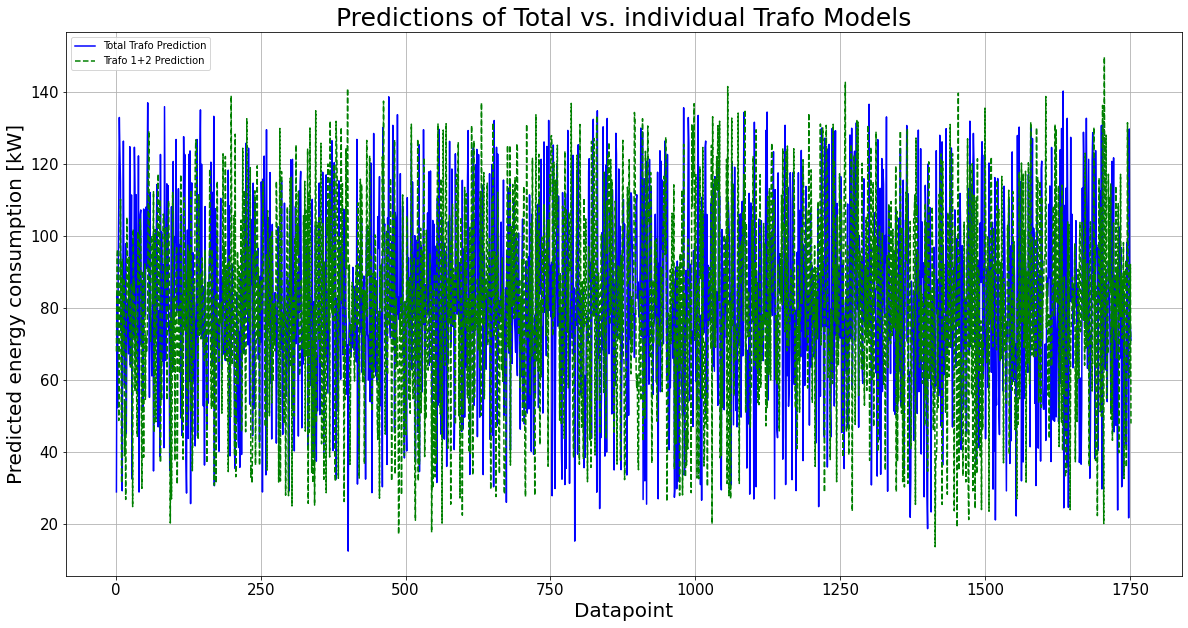

In [21]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(artx, trafo12, '-b', label='Total Trafo Prediction')
ax.plot(artx, predictions, '--g', label='Trafo 1+2 Prediction')
leg = ax.legend()

plt.title('Predictions of Total vs. individual Trafo Models', fontname='sans-serif', fontsize=25)
plt.xlabel("Datapoint", fontsize=20)
plt.ylabel("Predicted energy consumption [kW]", fontsize=20)
plt.grid(True)


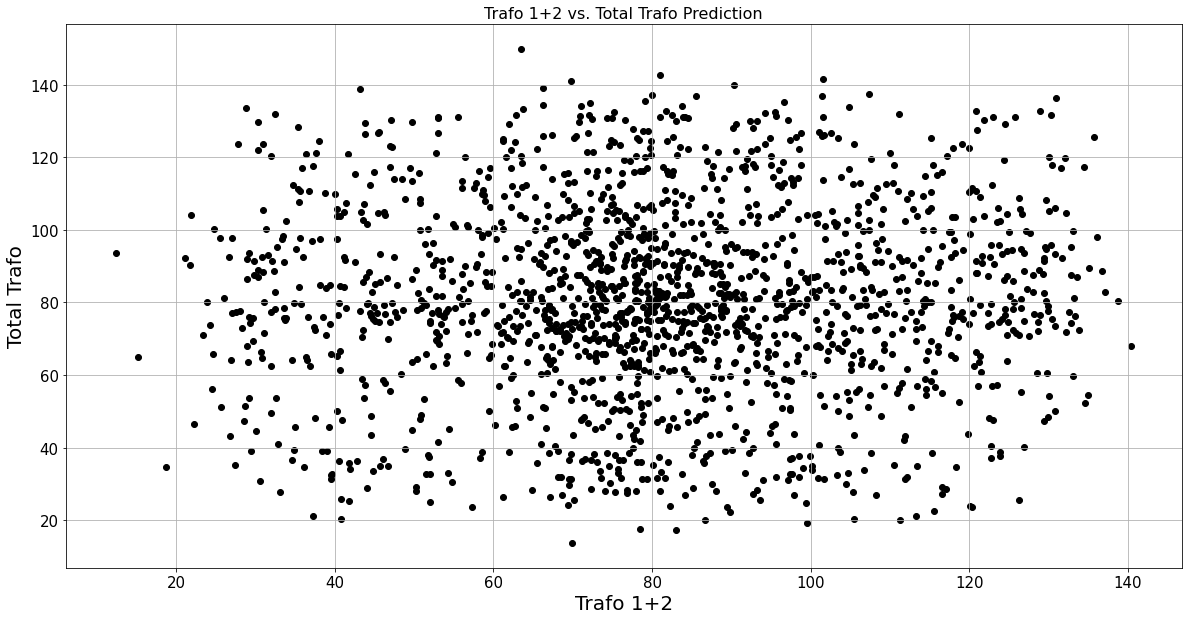

In [23]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.scatter(trafo12, predictions, color='black')
plt.title('Trafo 1+2 vs. Total Trafo Prediction', fontname='sans-serif', fontsize=16)
plt.xlabel("Trafo 1+2", fontsize=20)
plt.ylabel("Total Trafo", fontsize=20)
plt.grid(True)

In [64]:
MAE3 = r2_score(trafo12, predictions)
RMSE3 = np.sqrt(mean_squared_error(trafo12, predictions))
RMSE3 = round(RMSE3, 2)

txt3 = "The MAE is {MAE3}".format(MAE3 = MAE3)
txt4 = "The RMSE of the two different models is \033[1m {RMSE3} kW".format(RMSE3 = RMSE3)

print(txt3)
print(txt4)

The MAE is -0.9778439618094523
The RMSE of the two different models is  36.22 kW
